# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

El propósito del proyecto es determinar cual de las 2 tarifas prepago que ofrece el operador de telecomunicaciones Megaline genera mas ingresos para invertirle mas publicidad y atraer mas clientes a esa tarifa.

Pasos a seguir:
* Importar librerias
* Cargar, limpiar, preprosesar datos.
* explorar datos y analizar.
* Realizar y determinar hipotesis.


## Inicialización

In [7]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes!
</div>

## Cargar datos

In [8]:
# Carga los archivos de datos en diferentes DataFrames
usuarios_df = pd.read_csv(r'datasets\megaline_users.csv')
llamadas_df = pd.read_csv(r'datasets\megaline_calls.csv')
mensajes_df = pd.read_csv(r'datasets\megaline_messages.csv')
internet_df = pd.read_csv(r'datasets\megaline_internet.csv')
planes_df = pd.read_csv(r'datasets\megaline_plans.csv')

## Preparar los datos

En este paso se debe verificar los datos de los dataframes, mediante los metodo info() y head().

## Tarifas

In [9]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
planes_df.info()

# messages_included: SMS incluidos al mes.
# mb_per_month_included: datos incluidos al mes (en megabytes).
# minutes_included: minutos incluidos al mes.
# usd_monthly_pay: pago mensual en dólares estadounidenses.
# usd_per_gb: precio por gigabyte de los datos extra tras exceder los límites del paquete (1 GB = 1024 megabytes).
# usd_per_message: precio por SMS tras exceder los límites del paquete.
# usd_per_minute: precio por minuto tras exceder los límites del paquete (por ejemplo, si el paquete incluye 100 minutos, el operador cobrará el minuto 101).
# plan_name: nombre de la tarifa.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [10]:
# Imprime una muestra de los datos para las tarifas
planes_df.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


En este data frame se esperaba tener los valores de los 2 planes.
* No presenta valores ausentes.
* Los valores son los correctos de acuerdo a la información proporcionada.
* Los tipos de datos son los correctos, no se necesita trabajar en ellos.

## Corregir datos

Los datos no presentan errores.

## Enriquecer los datos

Considero que los datos estan correctos y claros.
* Se debe realizar la transformacion de megabytes a gigabytes 
* 1GB = 1024 MBs

## Usuarios/as

In [11]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
usuarios_df.info()

# user_id: identificador único del usuario.
# first_name: nombre del usuario.
# last_name: apellido del usuario.
# age: edad del usuario (en años).
# city: ciudad de residencia del usuario.
# reg_date: fecha de suscripción (dd, mm, aa).
# plan: nombre de la tarifa.
# churn_date: la fecha en la que el usuario dejó de usar el servicio (si el valor es ausente, la tarifa se estaba usando cuando fue extraída esta base de datos).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [12]:
# Imprime una muestra de datos para usuarios
usuarios_df.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN



* Los nombres de la tabla son los correctos 
* Presenta datos ausentes, de acuerdo a los datos representa que la tarifa se estaba usando cuando fue extraída esta base de datos.
* tiene columnas de fecha que deben ser modificadas para el analisis.
* pasar a un formato mejor de lectura de nombres ( todo a minuscula).


### Corregir los datos

Se va a convertir columnas de fechas a tipo datetime y  unificar el formato de las columnas de texto.

In [13]:

# Convertir columnas de fechas a tipo datetime
usuarios_df['reg_date'] = pd.to_datetime(usuarios_df['reg_date'])
usuarios_df['churn_date'] = pd.to_datetime(usuarios_df['churn_date'])

# Cambiar formato de las columnas de texto
usuarios_df['first_name'] = usuarios_df['first_name'].str.strip().str.lower()
usuarios_df['last_name'] = usuarios_df['last_name'].str.strip().str.lower()
usuarios_df['city'] = usuarios_df['city'].str.strip()

In [14]:
print(usuarios_df.info())
usuarios_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB
None


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,anamaria,bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,mickey,wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,carlee,hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,reynaldo,jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,leonila,thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT
5,1005,livia,shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaT
6,1006,jesusa,bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,eusebio,welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaT
8,1008,emely,hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaT
9,1009,gerry,little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaT


### Enriquecer los datos

Separar las ciudades de su estado en una columna de  Área Estadística Metropolitana (MSA).
Crear una columna nueva para determinar si el usuario sigue con el plan o lo cancelo.

In [15]:
# Separar la columna 'city' en 'area' y 'state'
usuarios_df[['area', 'state_msa']
            ] = usuarios_df['city'].str.split(', ', expand=True)

# Eliminar la parte 'MSA' de la columna 'state'
usuarios_df['state_msa'] = usuarios_df['state_msa'].str.replace(' MSA', '')
# Eliminar columna city
usuarios_df = usuarios_df.drop(columns=['city'])
# Cambiar el nombre de la columna 'metro_area' a 'city'
usuarios_df = usuarios_df.rename(columns={'area': 'city'})

# Crear una columna adicional para indicar si el usuario está activo
usuarios_df['is_active'] = usuarios_df['churn_date'].isna()

# Convertir churn_date a datetime, permitiendo NaT para valores NaN
# df['churn_date'] = pd.to_datetime(df['churn_date'], errors='coerce')

In [73]:
usuarios_df.head()

,user_id,first_name,last_name,age,reg_date,plan,churn_date,city,state_msa,is_active
0,1000,anamaria,bauer,45,2018-12-24,ultimate,NaT,Atlanta-Sandy Springs-Roswell,GA,True
1,1001,mickey,wilkerson,28,2018-08-13,surf,NaT,Seattle-Tacoma-Bellevue,WA,True
2,1002,carlee,hoffman,36,2018-10-21,surf,NaT,Las Vegas-Henderson-Paradise,NV,True
3,1003,reynaldo,jenkins,52,2018-01-28,surf,NaT,Tulsa,OK,True
4,1004,leonila,thompson,40,2018-05-23,surf,NaT,Seattle-Tacoma-Bellevue,WA,True


## Llamadas

In [17]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
llamadas_df.info()

# id: identificador único de la llamada.
# user_id: el identificador del usuario que realiza la llamada.
# call_date: fecha de la llamada.
# duration: duración de la llamada (en minutos).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [18]:
# Imprime una muestra de datos para las llamadas
print(llamadas_df.head())
print(llamadas_df.tail())

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22
              id  user_id   call_date  duration
137730  1499_199     1499  2018-11-21      8.72
137731  1499_200     1499  2018-10-20     10.89
137732  1499_201     1499  2018-09-21      8.12
137733  1499_202     1499  2018-10-10      0.37
137734  1499_203     1499  2018-12-29     13.86


In [19]:
llamadas_df.duplicated().sum()

np.int64(0)


* los nombres de columnas se encuentran bien
* los tipos de datos se encuentran mal, se debe cambiar a tipo datetime la columna 'call date'
* no presenta valores ausentes.
* el id de llamada se compone del id del ususario + un valor numerico separado por _

### Corregir los datos

corregir el tipo de dato de la fecha

In [20]:
llamadas_df['call_date'] = pd.to_datetime(llamadas_df['call_date'])

In [21]:
print(llamadas_df.info())
print(llamadas_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB
None
         id  user_id  call_date  duration
0   1000_93     1000 2018-12-27      8.52
1  1000_145     1000 2018-12-27     13.66
2  1000_247     1000 2018-12-27     14.48
3  1000_309     1000 2018-12-28      5.76
4  1000_380     1000 2018-12-30      4.22


### Enriquecer los datos

Se debe redondear las llamadas al numero superior, las decimas.
agregar columna de meses

In [22]:

llamadas_df['duration'] = llamadas_df['duration'].apply(math.ceil)

# Crear columna de meses
llamadas_df['month'] = llamadas_df['call_date'].dt.month

# Mostrar el resultado
llamadas_df

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9,12
1,1000_145,1000,2018-12-27,14,12
2,1000_247,1000,2018-12-27,15,12
3,1000_309,1000,2018-12-28,6,12
4,1000_380,1000,2018-12-30,5,12
...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,9,11
137731,1499_200,1499,2018-10-20,11,10
137732,1499_201,1499,2018-09-21,9,9
137733,1499_202,1499,2018-10-10,1,10


## Mensajes

In [23]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
print(mensajes_df.info())

print(mensajes_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None
            user_id
count  76051.000000
mean    1245.972768
std      139.843635
min     1000.000000
25%     1123.000000
50%     1251.000000
75%     1362.000000
max     1497.000000


In [24]:
# Imprime una muestra de datos para los mensajes
print(mensajes_df.head())
print(mensajes_df.tail())

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26
             id  user_id message_date
76046  1497_526     1497   2018-12-24
76047  1497_536     1497   2018-12-24
76048  1497_547     1497   2018-12-31
76049  1497_558     1497   2018-12-24
76050  1497_613     1497   2018-12-23


In [25]:
mensajes_df.duplicated().sum()

np.int64(0)

Los datos se encuentran bien,no se encuentran datos vacios ni nulos ni duplicados.


### Corregir los datos

Se modifica el tipo de dato de la fecha.

In [26]:
mensajes_df['message_date'] = pd.to_datetime(mensajes_df['message_date'])
mensajes_df.info()
mensajes_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


### Enriquecer los datos

Crear una columna de meses para agrupar por estos.

In [27]:
# Crear columna de meses
mensajes_df['month'] = mensajes_df['message_date'].dt.month

# Mostrar el resultado
mensajes_df

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12
...,...,...,...,...
76046,1497_526,1497,2018-12-24,12
76047,1497_536,1497,2018-12-24,12
76048,1497_547,1497,2018-12-31,12
76049,1497_558,1497,2018-12-24,12


## Internet

In [28]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet_df.info()
# id: identificador único de la sesión.
# mb_used: el volumen de datos gastados durante la sesión (en megabytes).
# session_date: fecha de la sesión web.
# user_id: identificador del usuario.
internet_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [29]:
# Imprime una muestra de datos para el tráfico de internet
print(internet_df.head())
print(internet_df.tail())

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22
              id  user_id session_date  mb_used
104820  1499_215     1499   2018-10-20   218.06
104821  1499_216     1499   2018-12-30   304.72
104822  1499_217     1499   2018-09-22   292.75
104823  1499_218     1499   2018-12-07     0.00
104824  1499_219     1499   2018-12-24   758.31


In [30]:
internet_df.duplicated().sum()

np.int64(0)

Los datos se encuentran completos no existen valores nulos ni duplicados.
* El tipo de dato de la fecha debe cambiarse.

### Corregir los datos

Se procede a cambiar el tipo de dato de la fecha

In [31]:
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'])
internet_df.info()
internet_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


### Enriquecer los datos

* se aumenta columna de mes
* Se debe tener en cuenta que ya separados los datos por meses se debe realizar la conversion a GB y redondeo respectivo

In [32]:
# Crear columna de meses
internet_df['month'] = internet_df['session_date'].dt.month

# Mostrar el resultado
internet_df

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12
...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,10
104821,1499_216,1499,2018-12-30,304.72,12
104822,1499_217,1499,2018-09-22,292.75,9
104823,1499_218,1499,2018-12-07,0.00,12


## Estudiar las condiciones de las tarifas

Valores de la tarifa

In [33]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
planes_df

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario


In [34]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

# Agrupar por 'user_id' y el mes de 'call_date', contar las llamadas y guardar el resultado
llamadas_por_mes = llamadas_df.groupby(
    [llamadas_df['user_id'], llamadas_df['month']])['id'].count().reset_index()

# Renombrar la columna 'id' a 'numero_llamadas'
llamadas_por_mes = llamadas_por_mes.rename(columns={'id': 'calls_made'})

llamadas_por_mes

,user_id,month,calls_made
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [35]:
# Crear una tabla dinamica para calcular el valor de duracion de llamadas por mes y el numero de llamadas realizadas.
pivot_calls = llamadas_df.pivot_table(index=['user_id', 'month'],
                                      values=['duration'],
                                      aggfunc=['sum', 'count']).reset_index()
pivot_calls

,user_id,month,sum,count
,,,duration,duration
0,1000,12,124,16
1,1001,8,182,27
2,1001,9,315,49
3,1001,10,393,65
4,1001,11,426,64
...,...,...,...,...
2253,1498,12,339,39
2254,1499,9,346,41
2255,1499,10,385,53


In [36]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

# Agrupar por 'user_id' y el mes de 'call_date', sumar la duración de las llamadas y guardar el resultado
minutos_por_mes = llamadas_df.groupby(
    [llamadas_df['user_id'], llamadas_df['month']])['duration'].sum().reset_index()

# Mostrar el resultado
minutos_por_mes

,user_id,month,duration
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426
...,...,...,...
2253,1498,12,339
2254,1499,9,346
2255,1499,10,385
2256,1499,11,308


In [37]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

# Agrupar por 'user_id' y el mes de 'message_date', contar los mensajes y guardar el resultado
mensajes_por_mes = mensajes_df.groupby(
    [mensajes_df['user_id'], mensajes_df['month']])['id'].count().reset_index()

# Renombrar la columna 'id' a 'sent_messages'
mensajes_por_mes = mensajes_por_mes.rename(columns={'id': 'sent_messages'})

# Mostrar el resultado
mensajes_por_mes

,user_id,month,sent_messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [38]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

# Agrupar por 'user_id' y el mes de 'session_date', sumar el volumen de datos por grupo
volumen_internet_por_mes = internet_df.groupby(
    [internet_df['user_id'], internet_df['month']])['mb_used'].sum().reset_index()

# Mostrar el resultado
volumen_internet_por_mes

,user_id,month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83


Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.

In [39]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
users_month_df = llamadas_por_mes.merge(
    minutos_por_mes, on=['user_id', 'month'], how='outer')
users_month_df = users_month_df.merge(
    mensajes_por_mes, on=['user_id', 'month'], how='outer')
users_month_df = users_month_df.merge(volumen_internet_por_mes, on=[
                                      'user_id', 'month'], how='outer')
users_month_df

,user_id,month,calls_made,duration,sent_messages,mb_used
0,1000,12,16.0,124.0,11.0,1901.47
1,1001,8,27.0,182.0,30.0,6919.15
2,1001,9,49.0,315.0,44.0,13314.82
3,1001,10,65.0,393.0,53.0,22330.49
4,1001,11,64.0,426.0,36.0,18504.30
...,...,...,...,...,...,...
2288,1498,12,39.0,339.0,NaN,23137.69
2289,1499,9,41.0,346.0,NaN,12984.76
2290,1499,10,53.0,385.0,NaN,19492.43
2291,1499,11,45.0,308.0,NaN,16813.83


In [40]:
users_month_df.isna().sum()

user_id            0
month              0
calls_made        35
duration          35
sent_messages    487
mb_used           16
dtype: int64

Hacer  Data Wrangling al dataframe combinado
* llenar valores nulos a 0 ya que estos son valores de consumo tipo int y seran 0 no afectaran al analisis.

In [41]:
# llenar los campos vacios con un valor de 0 y hacerlos tipo int.

# Llenar campos vacíos con 0
users_month_df.fillna(0, inplace=True)

# Convertir columnas a tipo int
users_month_df['calls_made'] = users_month_df['calls_made'].astype(int)
users_month_df['duration'] = users_month_df['duration'].astype(int)
users_month_df['sent_messages'] = users_month_df['sent_messages'].astype(int)

users_month_df

,user_id,month,calls_made,duration,sent_messages,mb_used
0,1000,12,16,124,11,1901.47
1,1001,8,27,182,30,6919.15
2,1001,9,49,315,44,13314.82
3,1001,10,65,393,53,22330.49
4,1001,11,64,426,36,18504.30
...,...,...,...,...,...,...
2288,1498,12,39,339,0,23137.69
2289,1499,9,41,346,0,12984.76
2290,1499,10,53,385,0,19492.43
2291,1499,11,45,308,0,16813.83


In [42]:
# Unir usuarios_df con planes_df
usuarios_con_planes_df = usuarios_df.merge(
    planes_df, left_on='plan', right_on='plan_name', how='left')

# Mostrar el resultado
usuarios_con_planes_df

,user_id,first_name,last_name,age,reg_date,plan,churn_date,city,state_msa,is_active,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,anamaria,bauer,45,2018-12-24,ultimate,NaT,Atlanta-Sandy Springs-Roswell,GA,True,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1001,mickey,wilkerson,28,2018-08-13,surf,NaT,Seattle-Tacoma-Bellevue,WA,True,50,15360,500,20,10,0.03,0.03,surf
2,1002,carlee,hoffman,36,2018-10-21,surf,NaT,Las Vegas-Henderson-Paradise,NV,True,50,15360,500,20,10,0.03,0.03,surf
3,1003,reynaldo,jenkins,52,2018-01-28,surf,NaT,Tulsa,OK,True,50,15360,500,20,10,0.03,0.03,surf
4,1004,leonila,thompson,40,2018-05-23,surf,NaT,Seattle-Tacoma-Bellevue,WA,True,50,15360,500,20,10,0.03,0.03,surf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1495,fidel,sharpe,67,2018-09-04,surf,NaT,New York-Newark-Jersey City,NY-NJ-PA,True,50,15360,500,20,10,0.03,0.03,surf
496,1496,ariel,shepherd,49,2018-02-20,surf,NaT,New Orleans-Metairie,LA,True,50,15360,500,20,10,0.03,0.03,surf
497,1497,donte,barrera,49,2018-12-10,ultimate,NaT,Los Angeles-Long Beach-Anaheim,CA,True,1000,30720,3000,70,7,0.01,0.01,ultimate
498,1498,scot,williamson,51,2018-02-04,surf,NaT,New York-Newark-Jersey City,NY-NJ-PA,True,50,15360,500,20,10,0.03,0.03,surf


In [43]:
# Añade la información de la tarifa
final_df = users_month_df.merge(usuarios_con_planes_df[['user_id', 'plan', 'messages_included', 'mb_per_month_included',
                                'minutes_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute']], on='user_id', how='left')

# Mostrar el resultado
final_df

,user_id,month,calls_made,duration,sent_messages,mb_used,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12,16,124,11,1901.47,ultimate,1000,30720,3000,70,7,0.01,0.01
1,1001,8,27,182,30,6919.15,surf,50,15360,500,20,10,0.03,0.03
2,1001,9,49,315,44,13314.82,surf,50,15360,500,20,10,0.03,0.03
3,1001,10,65,393,53,22330.49,surf,50,15360,500,20,10,0.03,0.03
4,1001,11,64,426,36,18504.30,surf,50,15360,500,20,10,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,12,39,339,0,23137.69,surf,50,15360,500,20,10,0.03,0.03
2289,1499,9,41,346,0,12984.76,surf,50,15360,500,20,10,0.03,0.03
2290,1499,10,53,385,0,19492.43,surf,50,15360,500,20,10,0.03,0.03
2291,1499,11,45,308,0,16813.83,surf,50,15360,500,20,10,0.03,0.03


In [44]:
# crear columna de conversion y aproximacion al superior de megas a Gbs consumidas
final_df['gb_used_adj'] = (final_df['mb_used']/1024).apply(math.ceil)
# crear columna de conversion de megas a Gbs incluidas en el plan
final_df['gb_per_month_included'] = (
    final_df['mb_per_month_included']/1024).astype(int)
final_df.loc[:, ['gb_used_adj', 'mb_used', 'gb_per_month_included']]

,gb_used_adj,mb_used,gb_per_month_included
0,2,1901.47,30
1,7,6919.15,15
2,14,13314.82,15
3,22,22330.49,15
4,19,18504.30,15
...,...,...,...
2288,23,23137.69,15
2289,13,12984.76,15
2290,20,19492.43,15
2291,17,16813.83,15



Para calcular el ingreso mensual de los usuarios, primero se debe calcular el uso adicional de llamadas, mensajes y datos.

Luego se multiplica el valor obtenido por el precio que se cobra al superar el plan.

Por ultimo se suma el valor del plan mas los valores de gastos adicionales de llamada, mensaje y datos.

In [45]:
# Calcula el ingreso mensual para cada usuario

# Calcular el uso adicional de llamadas,
final_df['extra_calls'] = (final_df['calls_made'] -
                           final_df['minutes_included']).clip(lower=0)
# Calcular el uso adicional  mensajes
final_df['extra_messages'] = (
    final_df['sent_messages'] - final_df['messages_included']).clip(lower=0)
# Calcular el uso adicional  datos
final_df['extra_gb'] = (final_df['gb_used_adj'] -
                        final_df['gb_per_month_included']).clip(lower=0)
final_df

,user_id,month,calls_made,duration,sent_messages,mb_used,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_used_adj,gb_per_month_included,extra_calls,extra_messages,extra_gb
0,1000,12,16,124,11,1901.47,ultimate,1000,30720,3000,70,7,0.01,0.01,2,30,0,0,0
1,1001,8,27,182,30,6919.15,surf,50,15360,500,20,10,0.03,0.03,7,15,0,0,0
2,1001,9,49,315,44,13314.82,surf,50,15360,500,20,10,0.03,0.03,14,15,0,0,0
3,1001,10,65,393,53,22330.49,surf,50,15360,500,20,10,0.03,0.03,22,15,0,3,7
4,1001,11,64,426,36,18504.30,surf,50,15360,500,20,10,0.03,0.03,19,15,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,12,39,339,0,23137.69,surf,50,15360,500,20,10,0.03,0.03,23,15,0,0,8
2289,1499,9,41,346,0,12984.76,surf,50,15360,500,20,10,0.03,0.03,13,15,0,0,0
2290,1499,10,53,385,0,19492.43,surf,50,15360,500,20,10,0.03,0.03,20,15,0,0,5
2291,1499,11,45,308,0,16813.83,surf,50,15360,500,20,10,0.03,0.03,17,15,0,0,2


In [46]:
# Calcular los cargos adicionales por el uso extra de llamadas
final_df['extra_calls_charge'] = final_df['extra_calls'] * \
    final_df['usd_per_minute']
# Calcular los cargos adicionales por el uso extra de mensajes
final_df['extra_messages_charge'] = final_df['extra_messages'] * \
    final_df['usd_per_message']
# Calcular los cargos adicionales por el uso extra de datos
final_df['extra_gb_charge'] = final_df['extra_gb'] * final_df['usd_per_gb']
final_df

,user_id,month,calls_made,duration,sent_messages,mb_used,plan,messages_included,mb_per_month_included,minutes_included,...,usd_per_message,usd_per_minute,gb_used_adj,gb_per_month_included,extra_calls,extra_messages,extra_gb,extra_calls_charge,extra_messages_charge,extra_gb_charge
0,1000,12,16,124,11,1901.47,ultimate,1000,30720,3000,...,0.01,0.01,2,30,0,0,0,0.0,0.00,0
1,1001,8,27,182,30,6919.15,surf,50,15360,500,...,0.03,0.03,7,15,0,0,0,0.0,0.00,0
2,1001,9,49,315,44,13314.82,surf,50,15360,500,...,0.03,0.03,14,15,0,0,0,0.0,0.00,0
3,1001,10,65,393,53,22330.49,surf,50,15360,500,...,0.03,0.03,22,15,0,3,7,0.0,0.09,70
4,1001,11,64,426,36,18504.30,surf,50,15360,500,...,0.03,0.03,19,15,0,0,4,0.0,0.00,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,12,39,339,0,23137.69,surf,50,15360,500,...,0.03,0.03,23,15,0,0,8,0.0,0.00,80
2289,1499,9,41,346,0,12984.76,surf,50,15360,500,...,0.03,0.03,13,15,0,0,0,0.0,0.00,0
2290,1499,10,53,385,0,19492.43,surf,50,15360,500,...,0.03,0.03,20,15,0,0,5,0.0,0.00,50
2291,1499,11,45,308,0,16813.83,surf,50,15360,500,...,0.03,0.03,17,15,0,0,2,0.0,0.00,20


In [47]:
# Calcular el ingreso total mensual por usuario
final_df['monthly_revenue'] = final_df['usd_monthly_pay'] + final_df['extra_calls_charge'] + \
    final_df['extra_messages_charge'] + final_df['extra_gb_charge']
final_df

,user_id,month,calls_made,duration,sent_messages,mb_used,plan,messages_included,mb_per_month_included,minutes_included,...,usd_per_minute,gb_used_adj,gb_per_month_included,extra_calls,extra_messages,extra_gb,extra_calls_charge,extra_messages_charge,extra_gb_charge,monthly_revenue
0,1000,12,16,124,11,1901.47,ultimate,1000,30720,3000,...,0.01,2,30,0,0,0,0.0,0.00,0,70.00
1,1001,8,27,182,30,6919.15,surf,50,15360,500,...,0.03,7,15,0,0,0,0.0,0.00,0,20.00
2,1001,9,49,315,44,13314.82,surf,50,15360,500,...,0.03,14,15,0,0,0,0.0,0.00,0,20.00
3,1001,10,65,393,53,22330.49,surf,50,15360,500,...,0.03,22,15,0,3,7,0.0,0.09,70,90.09
4,1001,11,64,426,36,18504.30,surf,50,15360,500,...,0.03,19,15,0,0,4,0.0,0.00,40,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,12,39,339,0,23137.69,surf,50,15360,500,...,0.03,23,15,0,0,8,0.0,0.00,80,100.00
2289,1499,9,41,346,0,12984.76,surf,50,15360,500,...,0.03,13,15,0,0,0,0.0,0.00,0,20.00
2290,1499,10,53,385,0,19492.43,surf,50,15360,500,...,0.03,20,15,0,0,5,0.0,0.00,50,70.00
2291,1499,11,45,308,0,16813.83,surf,50,15360,500,...,0.03,17,15,0,0,2,0.0,0.00,20,40.00


## Estudia el comportamiento de usuario

### Llamadas

In [48]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

# Filtrar, agrupar y sacar el promedio de duracion de llamadas
mean_surf = final_df[final_df['plan'] == 'surf'].groupby(
    'month')['duration'].mean().reset_index()
# Renombrar la columna 'duration' a 'duration_prom_call_surf'
mean_surf = mean_surf.rename(columns={'duration': 'duration_prom_call_surf'})

# Filtrar, agrupar y sacar el promedio de duracion de llamadas
mean_ultimate = final_df[final_df['plan'] == 'ultimate'].groupby(
    'month')['duration'].mean().reset_index()
# Renombrar la columna 'duration' a 'duration_prom_call_ultimate'
mean_ultimate = mean_ultimate.rename(
    columns={'duration': 'duration_prom_call_ultimate'})

# Agrupar los datos
avg_duration = mean_surf.merge(mean_ultimate, on=['month'], how='outer')
avg_duration

,month,duration_prom_call_surf,duration_prom_call_ultimate
0,1,203.000000,193.500000
1,2,297.000000,403.142857
2,3,330.000000,304.250000
3,4,351.540000,336.857143
4,5,399.584416,406.241379
5,6,431.298969,370.957447
6,7,449.983471,427.067797
7,8,410.111111,421.436620
8,9,414.226804,437.511628
9,10,429.729958,450.735849


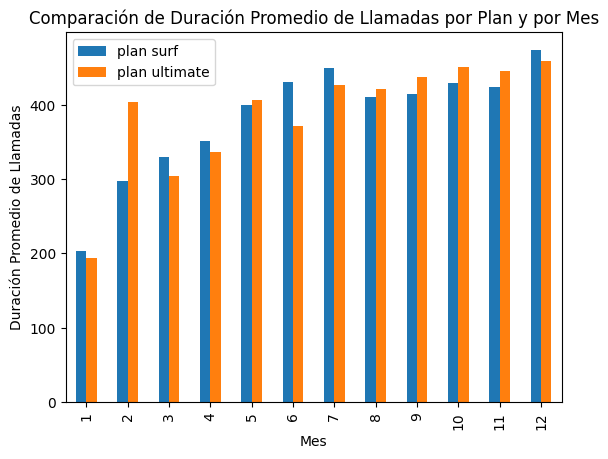

In [49]:
avg_duration.plot(x='month',
                  kind='bar',
                  title='Comparación de Duración Promedio de Llamadas por Plan y por Mes',
                  xlabel="Mes",
                  ylabel="Duración Promedio de Llamadas")
plt.legend(['plan surf', 'plan ultimate'])
plt.show()

In [50]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.


# Filtrar, agrupar y sumar duracion de llamadas
mins_surf = final_df[final_df['plan'] == 'surf'].groupby(
    'month')['duration'].sum().reset_index()
# Renombrar la columna 'duration'
mins_surf = mins_surf.rename(columns={'duration': 'minutes_surf'})

# Filtrar, agrupar y sumar  duracion de llamadas
mins_ultimate = final_df[final_df['plan'] == 'ultimate'].groupby(
    'month')['duration'].sum().reset_index()
# Renombrar la columna 'duration'
mins_ultimate = mins_ultimate.rename(columns={'duration': 'minutes_ultimate'})

# Agrupar los datos
mins_total = mins_surf.merge(mins_ultimate, on=['month'], how='outer')
mins_total

,month,minutes_surf,minutes_ultimate
0,1,406,774
1,2,2673,2822
2,3,7590,3651
3,4,17577,7074
4,5,30768,11781
5,6,41836,17435
6,7,54448,25197
7,8,66438,29922
8,9,80360,37626
9,10,101846,47778


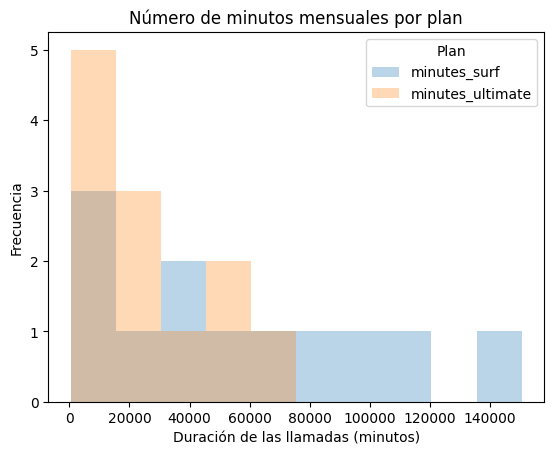

In [51]:
# Agrupar por plan y mes y sumar la duración
mins_total = mins_total[['minutes_surf', 'minutes_ultimate']]
mins_total.plot(kind='hist',
                bins=10,
                alpha=0.3)
plt.title('Número de minutos mensuales por plan')
plt.xlabel('Duración de las llamadas (minutos)')
plt.ylabel('Frecuencia')
plt.legend(title='Plan')
plt.show()

Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.

In [52]:
# Calcula la media y la varianza de la duración mensual de llamadas.

# Calcular la media de la duración mensual de llamadas
mean_duration = mins_total.mean().reset_index(name='mean_duration')

# Calcular la varianza de la duración mensual de llamadas
var_duration = np.var(mins_total).reset_index(name='var_duration')

# Unir las dos tablas para ver media y varianza juntos
mean_var_duration = mean_duration.merge(var_duration, on=['index'])

# Mostrar el resultado
mean_var_duration

c:\Users\HOME\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\fromnumeric.py:4006: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


,index,mean_duration,var_duration
0,minutes_surf,56201.916667,2.202716e+09
1,minutes_ultimate,25827.000000,4.784629e+08


<Axes: xlabel='plan', ylabel='duration'>

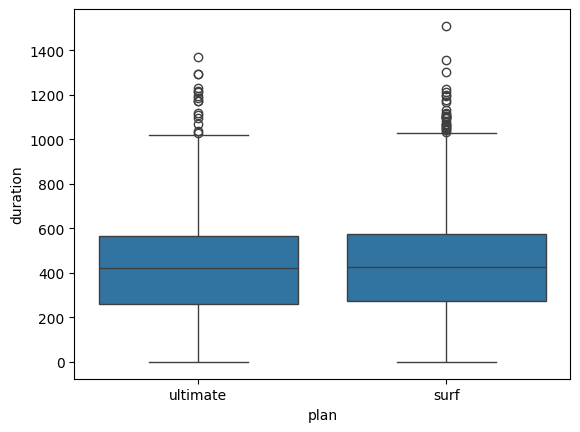

In [53]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
sns.boxplot(x='plan', y='duration', data=final_df)


* El comportamiento de llamadas tiene una leve variacion en las llamadas realizadas en los meses.
* Presentan un valor medio semenjante

### Mensajes

Para estudiar el comportamiento de los mensajes voy a realizar un proceso similar al de llamadas:
* identificar el promedio de mensajes enviados por mes y por usuarios de cada plan con una grafico de barras.
* comparar el número de mensajes mensuales que necesitan los usuarios de cada plan y trazar un histograma.
* calculr la media y la varianza del número de mensajes enviados mensualmente.
* realizar un diagrama de caja para visualizar la distribución del número de mensajes enviados mensualmente.



In [54]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

# Filtrar, agrupar y sacar el promedio de mensajes enviados al mes
mean_sms_surf = final_df[final_df['plan'] == 'surf'].groupby(
    'month')['sent_messages'].mean().reset_index()
# Renombrar la columna 'sent_messages'
mean_sms_surf = mean_sms_surf.rename(
    columns={'sent_messages': 'sent_messages_surf'})

# Filtrar, agrupar y sacar el promedio de de mensajes enviados al mes
mean_sms_ultimate = final_df[final_df['plan'] == 'ultimate'].groupby(
    'month')['sent_messages'].mean().reset_index()
# Renombrar la columna 'sent_messages'
mean_sms_ultimate = mean_sms_ultimate.rename(
    columns={'sent_messages': 'sent_messages_ultimate'})

# Agrupar los datos
avg_sms = mean_sms_surf.merge(mean_sms_ultimate, on=['month'], how='outer')
avg_sms

,month,sent_messages_surf,sent_messages_ultimate
0,1,10.500000,15.500000
1,2,12.000000,21.571429
2,3,15.260870,20.250000
3,4,17.400000,22.047619
4,5,24.012987,32.103448
5,6,25.298969,29.340426
6,7,27.033058,32.830508
7,8,28.777778,38.478873
8,9,30.762887,37.895349
9,10,33.839662,39.443396


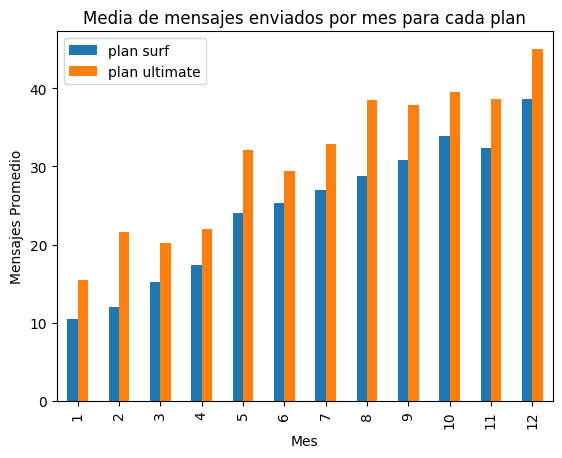

In [55]:
avg_sms.plot(x='month',
             kind='bar',
             title='Media de mensajes enviados por mes para cada plan',
             xlabel="Mes",
             ylabel="Mensajes Promedio")
plt.legend(['plan surf', 'plan ultimate'])
plt.show()

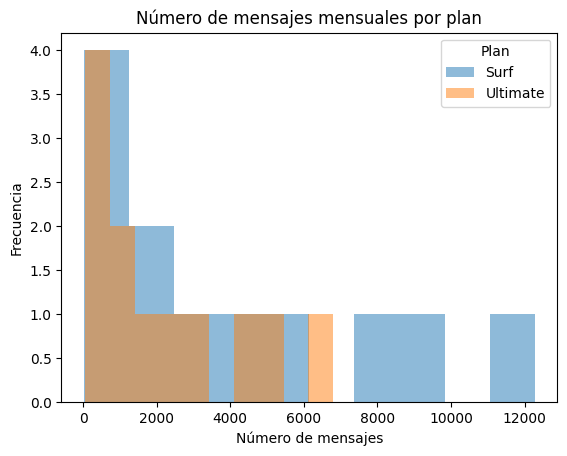

In [56]:
# Agrupar por plan y mes para obtener el total de mensajes enviados mensualmente
mensajes_por_mes = final_df.groupby(['plan', final_df['month']])[
    'sent_messages'].sum().reset_index()

# Dividir los datos por plan
mensajes_surf = mensajes_por_mes[mensajes_por_mes['plan']
                                 == 'surf']['sent_messages']
mensajes_ultimate = mensajes_por_mes[mensajes_por_mes['plan']
                                     == 'ultimate']['sent_messages']

# Trazar el histograma
plt.hist(mensajes_surf, bins=10, alpha=0.5, label='Surf')
plt.hist(mensajes_ultimate, bins=10, alpha=0.5, label='Ultimate')
plt.title('Número de mensajes mensuales por plan')
plt.xlabel('Número de mensajes')
plt.ylabel('Frecuencia')
plt.legend(title='Plan')
plt.show()

In [57]:
# Calcula la media y la varianza del número de mensajes enviados mensualmente
mean_var_sms = final_df.groupby('plan')['sent_messages'].agg([
    'mean', 'var']).reset_index()

# Renombrar las columna 'mean' y 'var'
mean_var_sms = mean_var_sms.rename(
    columns={'mean': 'mean_sms', 'var': 'var_sms'})
mean_var_sms

,plan,mean_sms,var_sms
0,surf,31.159568,1126.724522
1,ultimate,37.551389,1208.756744


<Axes: xlabel='plan', ylabel='sent_messages'>

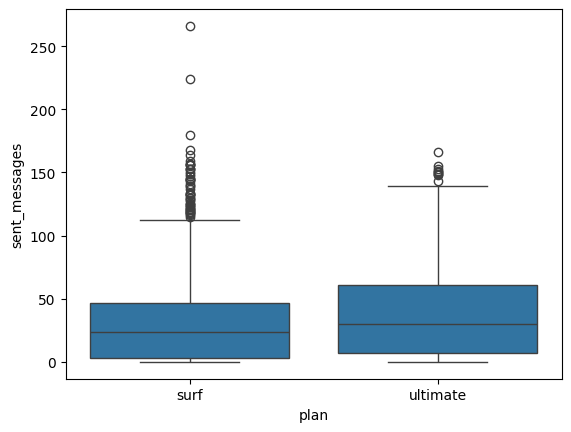

In [58]:
# Traza un diagrama de caja para visualizar la distribución del número de mensajes enviados mensualmente.
sns.boxplot(x='plan', y='sent_messages', order=[
            'surf', 'ultimate'], data=final_df)

* Plan surf  50 SMS incluidos en el plan
    * La media de mensajes del plan se encuentra en 32 mensajes aprox.
* Plan ultimate 1000 SMS incluidos en el plan
    * La media de mensajes del plan se encuentra en 38 mensajes aprox.
* Existe una diferencia de unos 5 mensajes promedio mas enviados por mes de los clientes que tienen el plan ultimate.
* La varianza es alta para ambos planes, lo que sugiere que la cantidad de mensajes enviados por los usuarios varía significativamente dentro de cada plan. 
    * La varianza es ligeramente mayor para el plan ultimate.
* El histograma muestra que existen muchos usuarios que no envias mensajes y que existe una distribucion dispersa entre el numero de mensajes enviados
* En el diagrama de caja se observa:
    * En ambos planes, surf y ultimate, hay varios outliers que indican usuarios que envían un número significativamente mayor de mensajes en comparación con la mayoría.
    

### Internet

Para estudiar el comportamiento del uso de internet voy a realizar un proceso similar a los anteriores:
* Identificar el promedio de uso de internet por mes y por usuarios de cada plan con un gráfico de barras.
* Comparar el número de datos mensuales de internet necesarios por los usuarios de cada plan y trazar un histograma.
* Calcular la media y la varianza del uso de internet mensual por plan.
* Realizar un diagrama de caja para visualizar la distribución del uso de internet mensual.

In [59]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

# Filtrar, agrupar y sacar el promedio de uso de internet en GBs mensual
mean_gb_surf = final_df[final_df['plan'] == 'surf'].groupby(
    'month')['gb_used_adj'].mean().reset_index()
# Renombrar la columna 'gb_used_adj'
mean_gb_surf = mean_gb_surf.rename(columns={'gb_used_adj': 'gb_used_surf'})

# Filtrar, agrupar y sacar el promedio de uso de internet en GBs mensual
mean_gb_ultimate = final_df[final_df['plan'] == 'ultimate'].groupby(
    'month')['gb_used_adj'].mean().reset_index()
# Renombrar la columna 'gb_used_adj'
mean_gb_ultimate = mean_gb_ultimate.rename(
    columns={'gb_used_adj': 'gb_used_ultimate'})

# Agrupar los datos
avg_gb = mean_gb_surf.merge(mean_gb_ultimate, on=['month'], how='outer')
avg_gb

,month,gb_used_surf,gb_used_ultimate
0,1,5.000000,7.250000
1,2,12.222222,17.285714
2,3,13.565217,18.416667
3,4,12.220000,16.333333
4,5,14.116883,16.862069
5,6,15.484536,15.425532
6,7,16.876033,16.491525
7,8,16.882716,17.845070
8,9,16.690722,17.011628
9,10,17.409283,17.716981


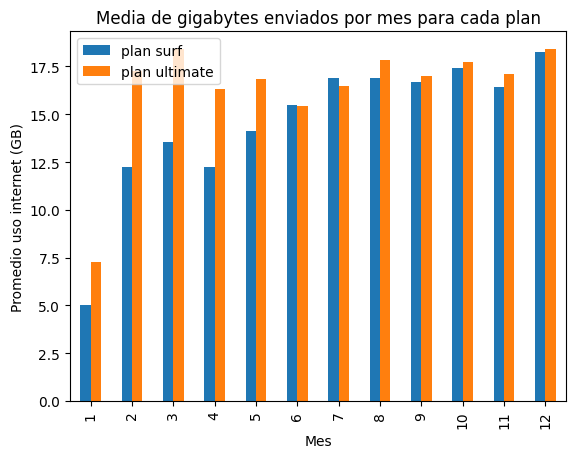

In [60]:
avg_gb.plot(x='month',
            kind='bar',
            title='Media de gigabytes enviados por mes para cada plan',
            xlabel="Mes",
            ylabel="Promedio uso internet (GB)")
plt.legend(['plan surf', 'plan ultimate'])
plt.show()

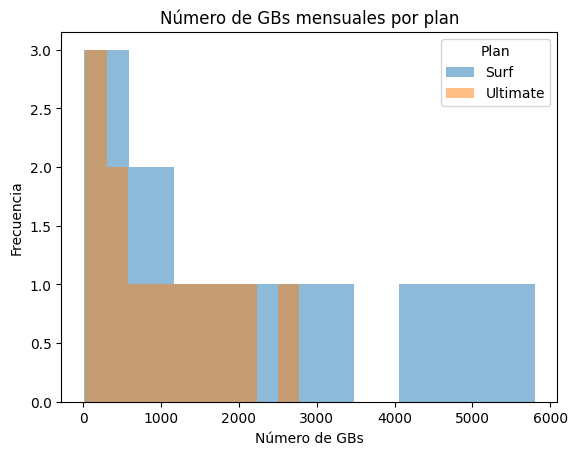

In [61]:
# Agrupar por plan y mes para obtener el total de GBs utilizados mensualmente
gb_por_mes = final_df.groupby(['plan', final_df['month']])[
    'gb_used_adj'].sum().reset_index()

# Dividir los datos por plan
gb_surf = gb_por_mes[gb_por_mes['plan'] == 'surf']['gb_used_adj']
gb_ultimate = gb_por_mes[gb_por_mes['plan'] == 'ultimate']['gb_used_adj']

# Trazar el histograma
plt.hist(gb_surf, bins=10, alpha=0.5, label='Surf')
plt.hist(gb_ultimate, bins=10, alpha=0.5, label='Ultimate')
plt.title('Número de GBs mensuales por plan')
plt.xlabel('Número de GBs')
plt.ylabel('Frecuencia')
plt.legend(title='Plan')
plt.show()

In [62]:
# Calcula la media y la varianza del uso de Gbs usados mensualmente
mean_var_gb = final_df.groupby('plan')['gb_used_adj'].agg([
    'mean', 'var']).reset_index()

# Renombrar las columna 'mean' y 'var'
mean_var_gb = mean_var_gb.rename(columns={'mean': 'mean_gb', 'var': 'var_gb'})
mean_var_gb

,plan,mean_gb,var_gb
0,surf,16.670693,61.58360
1,ultimate,17.306944,58.83055


<Axes: xlabel='plan', ylabel='gb_used_adj'>

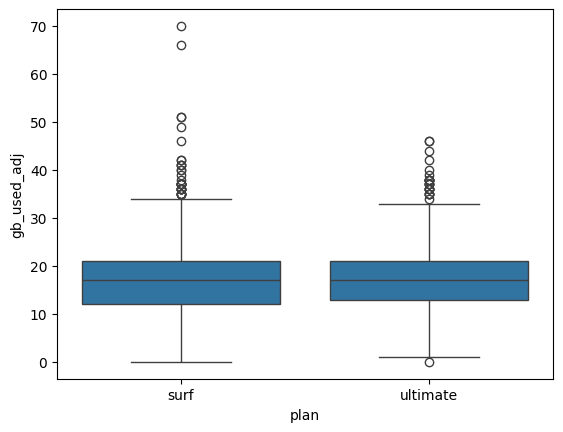

In [63]:
# Traza un diagrama de caja para visualizar la distribución del uso de GBs mensualmente.
sns.boxplot(x='plan', y='gb_used_adj', order=[
            'surf', 'ultimate'], data=final_df)

* Plan surf  15 GBs incluidos en el plan
    * La media de GBs uaados por clientes se encuentra en 17 GBs aprox.
* Plan ultimate 30 SMS incluidos en el plan
    * La media de GBs usados por clientes se encuentra en 18 GBs aprox. 
* En varios meses la diferencia entre el uso de datos en los diferentes planes es de 1GB aprox.
* La varianza en el uso de datos es similar para ambos planes
    * Los usuarios del plan Ultimate usan un poco más de datos en promedio, su uso es un poco más uniforme en comparación con los usuarios del plan Surf.
    * La varianza es ligeramente mayor para el plan surf.
* El histograma muestra que existen muchos usuarios que no usan datos y que existe una distribucion semenjante entre el uso de GBs en los planes
* En el diagrama de caja se observa:
    * Hay varios valores atípicos por encima de 35 GB, algunos alcanzando hasta 70 GB, indicando que algunos usuarios del plan Surf usan datos de manera significativamente diferente al promedio.

## Ingreso

In [64]:
revenue_stats = final_df.groupby('plan')['monthly_revenue'].agg(
    ['mean', 'var', 'std', 'min', 'max', 'median']).reset_index()
revenue_stats

,plan,mean,var,std,min,max,median
0,surf,58.862638,2975.596549,54.549029,20.0,572.28,40.0
1,ultimate,72.313889,129.848486,11.395108,70.0,182.00,70.0


In [65]:
# Comprara el valor total de ingresos por mes para de cada plan

# Filtrar, agrupar y sacar el promedio de ingresos por mes
monthly_revenue_surf = final_df[final_df['plan'] == 'surf'].groupby(
    'month')['monthly_revenue'].mean().reset_index()
# Renombrar la columna 'monthly_revenue'
monthly_revenue_surf = monthly_revenue_surf.rename(
    columns={'monthly_revenue': 'monthly_revenue_surf'})

# Filtrar, agrupar y sacar el promedio de de mensajes enviados al mes
monthly_revenue_ultimate = final_df[final_df['plan'] == 'ultimate'].groupby(
    'month')['monthly_revenue'].mean().reset_index()
# Renombrar la columna 'sent_messages'
monthly_revenue_ultimate = monthly_revenue_ultimate.rename(
    columns={'monthly_revenue': 'monthly_revenue_ultimate'})

# Agrupar los datos
avg_revenue = monthly_revenue_surf.merge(
    monthly_revenue_ultimate, on=['month'], how='outer')
avg_revenue

,month,monthly_revenue_surf,monthly_revenue_ultimate
0,1,20.000000,70.000000
1,2,33.360000,70.000000
2,3,45.234348,74.666667
3,4,39.652200,73.000000
4,5,45.969610,70.724138
5,6,47.675155,71.638298
6,7,60.475868,71.898305
7,8,62.278951,72.859155
8,9,56.835515,72.034884
9,10,63.626920,72.311321


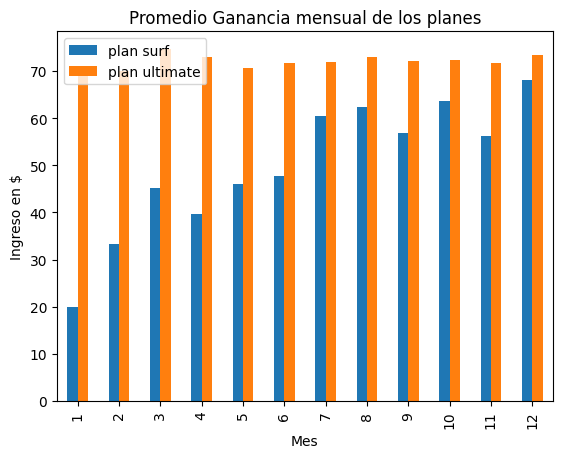

In [66]:
avg_revenue.plot(x='month',
                 kind='bar',
                 title='Promedio Ganancia mensual de los planes',
                 xlabel="Mes",
                 ylabel="Ingreso en $")
plt.legend(['plan surf', 'plan ultimate'])
plt.show()

<Axes: xlabel='plan', ylabel='monthly_revenue'>

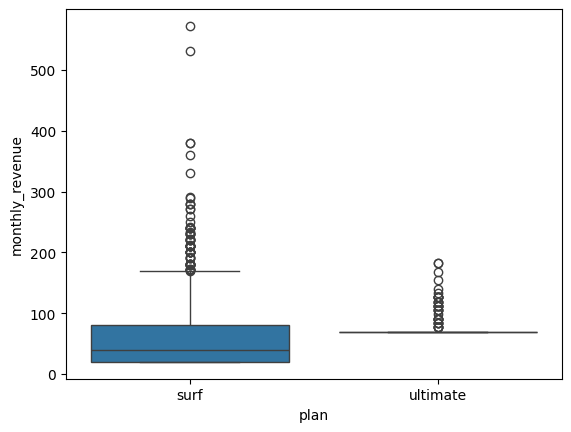

In [67]:
# Traza un diagrama de caja para visualizar la distribución del uso de GBs mensualmente.
sns.boxplot(x='plan', y='monthly_revenue', order=[
            'surf', 'ultimate'], data=final_df)

In [68]:
# Agrupar por plan y contar el número de usuarios
plan_counts = final_df.groupby('plan')['user_id'].nunique().reset_index()

# Renombrar las columnas para mayor claridad
plan_counts.columns = ['plan', 'number_of_users']
# Imprimir los resultados
plan_counts

,plan,number_of_users
0,surf,333
1,ultimate,157


* Los usuarios del plan Ultimate generan en promedio más ingresos que los del plan Surf.
* La dispersión de los ingresos es mucho mayor en el plan Surf, indicando una variabilidad alta en los ingresos generados por sus usuarios.
* El plan Ultimate muestra ingresos más consistentes con una menor variabilidad, reflejado en su baja desviación estándar y mediana igual a su mínimo.
* El plan Surf tiene un rango de ingresos más amplio, con valores máximos significativamente más altos que el plan Ultimate.
* Se tiene una mayoria de usuarios en el plan surf casi el doble del plan ultimate
* Ademas existen 10 clientes que no presentan datos de llamadas, mensajes, ni datos, por lo que el numero de clientes trabajados finalmente es de 490.

## Prueba las hipótesis estadísticas

Para probar la hipótesis de que los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf son diferentes se sigue los siguientes pasos.
* crear hipotesis nula.
* crear hipotesis alternativa.
* realizar la prueba estadística y determinar el valor alfa

* Hipótesis nula: Los ingresos promedio de los usuarios de los planes Ultimate y Surf son iguales.
* Hipótesis alternativa: Los ingresos promedio de los usuarios de los planes Ultimate y Surf son diferentes.
* Prueba estadistica: una prueba t de dos muestras independientes
* Valor alfa: 0.05 lo que significa que estamos dispuestos a aceptar un 5% de probabilidad de cometer un error (rechazar la hipótesis nula cuando es verdadera)

In [69]:
# Prueba las hipótesis

# Filtrar los datos por plan
surf_revenue = final_df[final_df['plan'] == 'surf']['monthly_revenue']
ultimate_revenue = final_df[final_df['plan'] == 'ultimate']['monthly_revenue']

# Determinar el valor alfa
alpha = 0.05

# Prueba t de dos muestras independientes
results = st.ttest_ind(surf_revenue, ultimate_revenue, equal_var=False)

In [70]:
# imprimir el valor p resultante
print('valor p: ', results.pvalue)

# comparar el valor p con el umbral
if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  2.5613755181532966e-20
Rechazamos la hipótesis nula


El valor p es menor que 0.05, rechazamos la hipótesis nula y concluimos que hay una diferencia significativa en los ingresos promedio entre los dos planes.

Para probar la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones, se debe hacer lo siguiente:
* Crear hipótesis nula y alternativa.
* realizar la prueba estadística y determinar el valor alfa.


- Hipótesis nula: El ingreso promedio de los usuarios del área NY-NJ es igual al ingreso promedio de los usuarios de otras regiones.
- Hipótesis alternativa: El ingreso promedio de los usuarios del área NY-NJ es diferente al ingreso promedio de los usuarios de otras regiones.
- Prueba estadistica: una prueba t de dos muestras independientes
- Valor alfa: 0.05 lo que significa que estamos dispuestos a aceptar un 5% de probabilidad de cometer un error

In [71]:
# Prueba las hipótesis

# Añade la información de la tarifa
area_df = final_df.merge(usuarios_con_planes_df[[
                         'user_id', 'city', 'state_msa']], on='user_id', how='left')
print(area_df['city'].unique())
print(area_df['state_msa'].unique())

['Atlanta-Sandy Springs-Roswell' 'Seattle-Tacoma-Bellevue'
 'Las Vegas-Henderson-Paradise' 'Tulsa' 'Dallas-Fort Worth-Arlington'
 'San Francisco-Oakland-Berkeley' 'Grand Rapids-Kentwood'
 'Orlando-Kissimmee-Sanford' 'San Jose-Sunnyvale-Santa Clara'
 'Cleveland-Elyria' 'Chicago-Naperville-Elgin' 'Knoxville'
 'New York-Newark-Jersey City' 'Pittsburgh' 'Fresno'
 'Washington-Arlington-Alexandria' 'Indianapolis-Carmel-Anderson'
 'Jacksonville' 'Los Angeles-Long Beach-Anaheim' 'Omaha-Council Bluffs'
 'Houston-The Woodlands-Sugar Land' 'Philadelphia-Camden-Wilmington'
 'Tampa-St. Petersburg-Clearwater' 'Birmingham-Hoover' 'Oklahoma City'
 'Charlotte-Concord-Gastonia' 'Denver-Aurora-Lakewood'
 'Nashville-Davidson–Murfreesboro–Franklin' 'Columbus' 'Albuquerque'
 'Boston-Cambridge-Newton' 'Miami-Fort Lauderdale-West Palm Beach'
 'San Diego-Chula Vista-Carlsbad' 'Phoenix-Mesa-Chandler'
 'Portland-Vancouver-Hillsboro' 'Cincinnati' 'Columbia'
 'San Antonio-New Braunfels' 'Buffalo-Cheektowaga' 'Memp

In [72]:
# Segregar los datos por ciudad
ny_nj_revenue = area_df[area_df['city'] ==
                        'New York-Newark-Jersey City']['monthly_revenue']
other_regions_revenue = area_df[area_df['city'] !=
                                'New York-Newark-Jersey City']['monthly_revenue']

# Determinar el valor alfa
alpha = 0.05

# Prueba t de dos muestras independientes
results_area = st.ttest_ind(
    ny_nj_revenue, other_regions_revenue, equal_var=False)
# imprimir el valor p resultante
print('valor p: ', results_area.pvalue)

# comparar el valor p con el umbral
if (results_area.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  0.028765503550625456
Rechazamos la hipótesis nula


## Conclusión general


* La prueba estadística indicó que hay una diferencia significativa en los ingresos promedio entre los usuarios de los planes Surf y Ultimate, con el plan Ultimate generando más ingresos en promedio.
* Los usuarios de la tarifa Ultimate tienden a generar ingresos más altos y con menos variabilidad en comparación con los usuarios de la tarifa Surf.
* La tarifa Surf muestra una mayor dispersión en los ingresos, con algunos usuarios generando ingresos muy altos.
* Duración de Llamadas: No se observan diferencias significativas en la duración promedio de las llamadas entre los dos planes, aunque los usuarios de Ultimate tienden a consumir más minutos.
* Mensajes Enviados: Los usuarios de Ultimate envían más mensajes en promedio que los usuarios de Surf.
* Uso de Datos: El uso de datos es ligeramente superior en el plan Ultimate, aunque la diferencia no es muy marcada.
* Se encontró una diferencia significativa en los ingresos promedio entre los usuarios del área NY-NJ y los usuarios de otras regiones, lo que sugiere que la ubicación geográfica puede influir en los ingresos generados.

Dado que el plan Ultimate genera mayores ingresos promedio y tiene una variabilidad menor, es recomendable invertir más en publicidad para atraer más clientes a esta tarifa, ademas su estabilidad en los ingresos del plan Ultimate lo hace una opción más segura.

Considerar la segmentación geográfica puede ayudar a optimizar los ingresos en función de las características específicas de los usuarios en diferentes regiones.